In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('data_science_job.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [11]:
cols=[var for var in data.columns if data[var].isnull().mean()<0.05 and data[var].isnull().mean()>0]
cols
      

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
data[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
4815,0.926,no_enrollment,Graduate,9.0,122.0
1924,0.527,no_enrollment,Graduate,5.0,15.0
11020,0.887,no_enrollment,High School,6.0,61.0
2995,0.920,no_enrollment,High School,20.0,138.0
3042,0.893,no_enrollment,Graduate,20.0,19.0


In [15]:
data.shape

(19158, 13)

In [21]:
new_data=data[cols].dropna()

In [22]:
new_data.shape

(17182, 5)

In [24]:
len(new_data)/len(data)

0.8968577095730244

<Axes: >

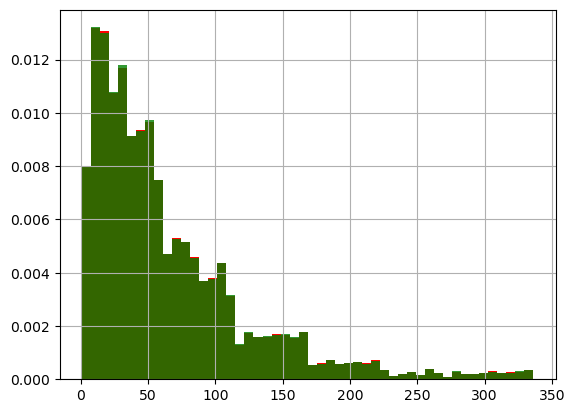

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['training_hours'].hist(bins=50,density=True,ax=ax,color='red')
new_data['training_hours'].hist(bins=50,density=True,ax=ax,color='green',alpha=0.8)


<Axes: >

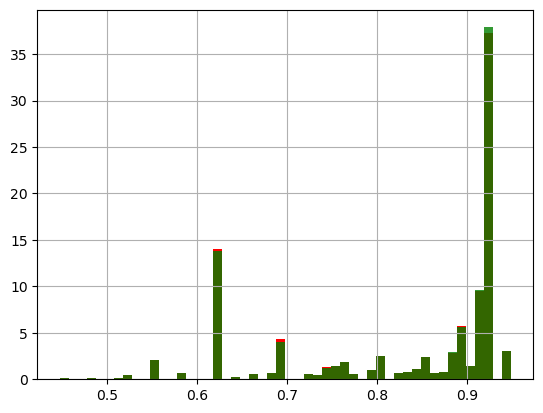

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['city_development_index'].hist(bins=50,density=True,ax=ax,color='red')
new_data['city_development_index'].hist(bins=50,density=True,ax=ax,color='green',alpha=0.8)

<Axes: ylabel='Density'>

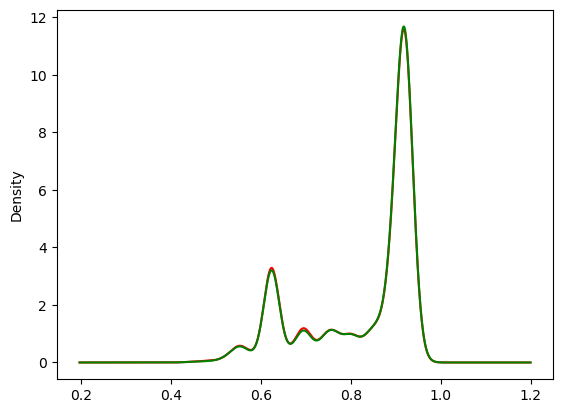

In [52]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['city_development_index'].plot.density(color='red')
new_data['city_development_index'].plot.density(color='green')

In [61]:
temp=pd.concat([
    data['education_level'].value_counts()/len(data),
    new_data['education_level'].value_counts()/len(new_data)
],axis=1)
temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
